# Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

In the real world, it is rare to have access the entire population dataset, which makes it difficult to calculate the true mean and standard deviation. However, statistics provides us with methods to estimate these parameters with a certain level of confidence, by using a sample dataset that is representative of the population.

By applying statistical techniques to the sample dataset, we can calculate a point estimate of the population mean and standard deviation. This point estimate provides a single value that is used to represent the population parameter.

To account for this uncertainty, we can also calculate an interval estimate, which provides a range of values that is likely to contain the true population parameter with a certain level of confidence. The level of confidence is usually expressed as a percentage, and it reflects the probability that the true population parameter falls within the given range.

# Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation

In [1]:
import math
from scipy.stats import t
from scipy.stats import ttest_ind

In [2]:
def estimate_mean( sample_mean, sample_std, sample_size ):
    """This function estimate the population mean using the sample mean, standard deviation ,and sample size."""
    alpha = 0.05
    
    #bondary for a two tailed 
    t_crit = t.ppf(1-alpha/2, sample_size-1 )
    
    #standard error of the mean
    std_error = sample_std/math.sqrt(sample_size)
    
    #margin error using 95% confidence interval
    margin_error = t_crit * std_error
    
    #lower and upper bounds of CI
    lower_bound = sample_mean - margin_error
    upper_bound = sample_mean + margin_error
    
    #return the point estimate and interval estimate
    return sample_mean, (lower_bound,upper_bound)

In [3]:
# Example usage
sample_mean = 10.5
sample_std = 2.3
sample_size = 100

est_mean, conf_interval = estimate_mean(sample_mean, sample_std, sample_size)

print("Estimated population mean:", est_mean)
print("95% Confidence interval:", conf_interval)

Estimated population mean: 10.5
95% Confidence interval: (10.043630101153003, 10.956369898846997)


# Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.



In real-life scenarios, there may be instances where we already have a known parameter for the population.  In order to verify its validity with our dataset, we can perform a hypothesis test by challenging the existing parameter with our new hypotheses.

The process involves formulating a null hypothesis (the existing parameter is still valid) and an alternative hypothesis (the existing parameter is not valid), and then analyzing the data to see if there is enough evidence to reject the null hypothesis.

Hypothesis testing is an important statistical tool that allows us to make decisions based on data. Here are some of the key reasons why hypothesis testing is important:
1. It allows us to make decisions about the population based on a sample, which is often the only data we have.
2. It allows professionals to test their theories and assumptions before putting them into action. This essentially allows an organization to verify its analysis is correct before committing resources to implement a broader strategy.
3. It helps us to avoid making errors, such as rejecting a true hypothesis or accepting a false hypothesis.
4. It can be used to make predictions about the future.

# Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.



Here's an example of a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students:

Null Hypothesis: The average weight of male college students is equal to the average weight of female college students.

Alternative Hypothesis: The average weight of male college students is greater than the average weight of female college students.

First we assume that Null Hypothesis is correct


In [4]:
# male sample
mean1 = 70
std1 = 4
n1 = 32

# female sample
mean2 = 65
std2 = 6
n2 = 35

#significance value
alpha = 0.05

Since our sample have different standard deviation we use this formula
<img src="img/df.svg">

In [5]:
df = ((std1**2/n1 + std2**2/n2 )**2)/( (std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1) )
print(f"Degree of freedom: {df}")

Degree of freedom: 59.63433389011337


In [6]:
# t-table of 95% with degree of freedom 60
t_crit = t.ppf( 1-alpha, 60 )
print(t_crit)

1.6706488646505926


Since we assumed that the null hypothesis is correct ,T value is given by :
<img src="img/t-test1.svg">
Where
<img src="img/t-test2.svg">

In [7]:
t_stat = (mean1 - mean2)/ math.sqrt( std1**2/n1 + std2**2/n2 )
print( f"t-statistic = {t_stat}") 

t-statistic = 4.04414888288202


In [8]:
import numpy as np
import matplotlib.pyplot as plt

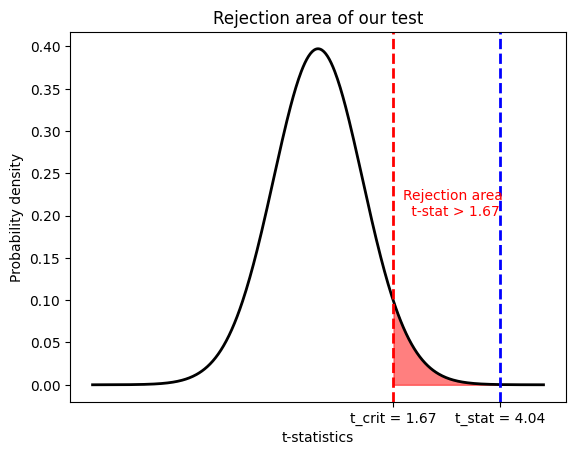

In [9]:
# Define the x-axis values for the t-distribution
x = np.linspace(-5, 5, 500)

# Plot the t-distribution with the rejection region shaded in red
fig, ax = plt.subplots()
ax.plot(x, t.pdf(x, df), 'k-', lw=2)
ax.axvline(t_crit, color='r', linestyle='--', lw=2)
ax.fill_between(x[x > t_crit], t.pdf(x[x > t_crit], df), color='r', alpha=0.5)
ax.axvline(t_stat, color='b', linestyle='--', lw=2)

# Add t_crit and t_val to x ticks
ax.set_xticks([t_crit, t_stat])
ax.set_xticklabels([f't_crit = {t_crit:.2f}', f't_stat = {t_stat:.2f}'])

# Add labels for the rejection area
ax.text(3, 0.20, f'Rejection area\n t-stat > {t_crit:.2f}', fontsize=10, ha='center',c= "red")

ax.set_xlabel('t-statistics')
ax.set_ylabel('Probability density')
ax.set_title('Rejection area of our test')
plt.show()

T_value is greater than the boundary of 95% ,so we can reject our Null hypothesis. We can conclude that the average weight of male college students is greater than the average weight of female college students.

# Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.



In [10]:
def test_diff_mean( sample1, sample2, alpha ):
    """This function conduct a hypothesis test on the difference beween two population means"""
    #parameter sample1
    mean1 = np.mean(sample1)
    std1 = np.std( sample1 )
    n1 = len(sample1)
    
    #parameter sample2
    mean2 = np.mean(sample2)
    std2 = np.std(sample2)
    n2 = len(sample2)
    
    #calcule of degree of freedom 
    df = ((std1**2/n1 + std2**2/n2 )**2)/( (std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1) )
    
    # bondary for a two tail test
    t_crit = t.ppf( 1-alpha/2, df )
    lower_bound = -t_crit
    upper_bound = t_crit
    
    #calcul t value
    t_stat = (mean1 - mean2)/ math.sqrt( std1**2/n1 + std2**2/n2 )
    
    #Plot the graph to show rejection area
    # Define the x-axis values for the t-distribution
    x = np.linspace(-5, 5, 500)

    # Plot the t-distribution with the rejection region shaded in red
    fig, ax = plt.subplots()
    ax.plot(x, t.pdf(x, df), 'k-', lw=2)
    ax.axvline(upper_bound, color='r', linestyle='--', lw=2)
    ax.axvline(lower_bound, color='r', linestyle='--', lw=2)
    ax.fill_between(x[x > upper_bound], t.pdf(x[x > upper_bound], df), color='r', alpha=0.5)
    ax.fill_between(x[x < lower_bound], t.pdf(x[x < lower_bound], df), color='r', alpha=0.5)
    ax.axvline(t_stat, color='b', linestyle='--', lw=2)

    # Add t_crit and t_val to x ticks
    ax.set_xticks([lower_bound,upper_bound, t_stat])
    ax.set_xticklabels([format(lower_bound, '.2f'),format(upper_bound, '.2f'),format(t_stat, '.2f')])

    ax.set_xlabel('t_stat')
    ax.set_ylabel('Probability density')
    ax.set_title('Rejection area of our test')
    plt.show()
    
    if t_stat < lower_bound or t_stat > upper_bound:    
        return "Mean of the two sample are different"
    
    elif t_stat > lower_bound and t_stat < upper_bound:
        return "Mean of the two sample are similar"
    

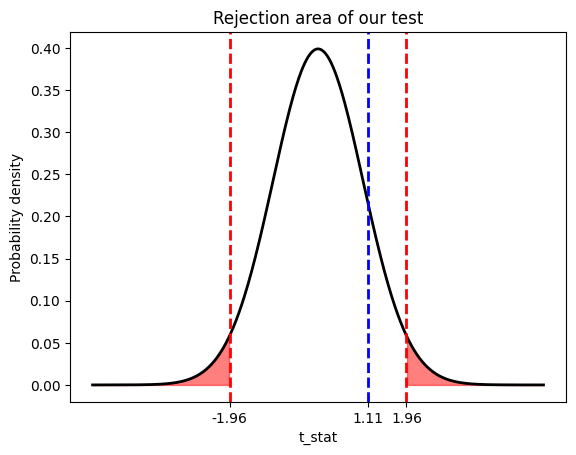

'Mean of the two sample are similar'

In [25]:
test_diff_mean(np.random.normal(10, 3, 1000), np.random.normal(10, 2, 1000), 0.05  )

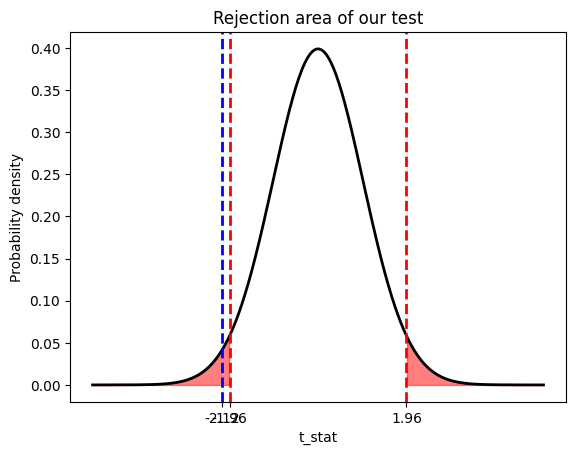

'Mean of the two sample are different'

In [26]:
test_diff_mean(np.random.normal(10, 3, 1000), np.random.normal(10.2, 2, 1000), 0.05  )

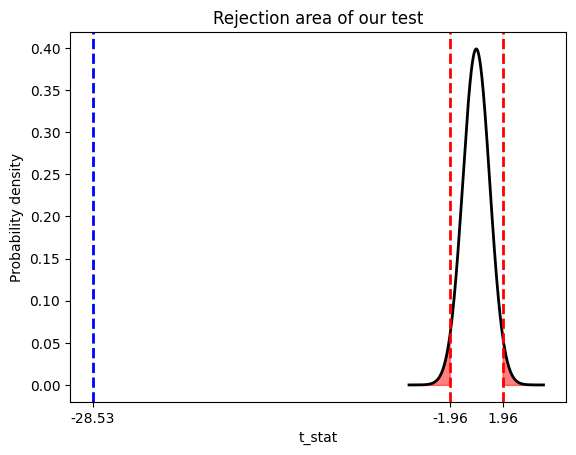

'Mean of the two sample are different'

In [13]:
test_diff_mean(np.random.normal(10, 3, 1000), np.random.normal(13, 2, 1000), 0.05  )

# Q6: What is a null and alternative hypothesis? Give some examples.



The null hypothesis is the statement that we are trying to disprove and the alternative hypothesis is the hypothesis that we are trying to prove and which is accepted if we have sufficient evicence to rejecect the null hypothesis. 

For example, in Q4, we check if the average weight of male college students is greater than the average weight of female college students. We took Ho: The average weight of male college students is equal to the average weight of female college students and Ha: The average weight of male college students is greater than the average weight of female college students. 

# Q7: Write down the steps involved in hypothesis testing.


Here are the general steps involved in hypothesis testing:

1. State the null hypothesis (H0) and alternative hypothesis (Ha)
2. Determine the level of significance (alpha)
3. Choose an appropriate statistical test based on the type of data and research question
4. Calculate the test statistic (e.g., t-statistic, z-score, F-statistic)
5. Determine the p-value associated with the test statistic
6. Compare the p-value with the level of significance (alpha) to determine whether to reject or fail to reject the null hypothesis
7. Interpret the results in the context of the research question and draw conclusions.

<img src="img/test.png">

# Q8. Define p-value and explain its significance in hypothesis testing.


P-Value is a measure of how likely is that the observed data would have occurred by random chance.The p-value is a probability value that helps us determine the strength of evidence against the null hypothesis.

A small p-value (typically less than 0.05) indicates that the observed data is unlikely to have occurred by chance alone, and provides evidence against the null hypothesis. If the p-value is larger than 0.05, then we fail to reject the null hypothesis, as there is insufficient evidence to suggest that the null hypothesis is false.

# Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.


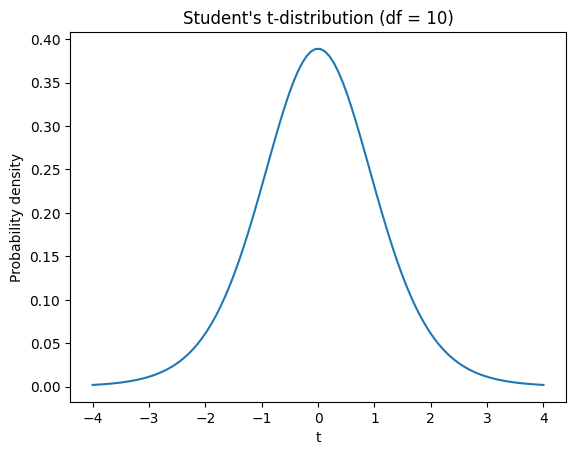

In [14]:
# Set the degrees of freedom
df = 10

# Generate 100 points on the x-axis
x = np.linspace(-4, 4, 100)

# Calculate the t-distribution probabilities for each x-value
y = t.pdf(x, df)

# Plot the t-distribution
plt.plot(x, y)

# Add labels and title
plt.xlabel("t")
plt.ylabel("Probability density")
plt.title("Student's t-distribution (df = 10)")

# Show the plot
plt.show()

# Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.


In [15]:
# Generate two random samples of equal size
sample1 = np.random.normal(10, 2, size=10)
sample2 = np.random.normal(12, 2.5, size=100)

# Calculate the t-statistic and p-value using the ttest_ind function and different variance
t_stat, p_val = ttest_ind(sample1, sample2, equal_var=False)

# Print the results
print("t-statistic = ", t_stat)
print("p-value = ", p_val)

alpha = 0.05
print("alpha =",alpha)

# Test the null hypothesis
if p_val < alpha:
    print("p_val is less than alpha so we reject the null hypotheses.Population means are not equal")
else:
    print("p_val is greater or equal to alpha so we fail to reject the null hypotheses. Populations mean are equal")

t-statistic =  -3.496007805718168
p-value =  0.0031155702157397254
alpha = 0.05
p_val is less than alpha so we reject the null hypotheses.Population means are not equal


# Q11: What is Student’s t distribution? When to use the t-Distribution.


The t-distribution, also known as the Student’s t-distribution, is a type of probability distribution that is similar to the normal distribution with its bell shape but has heavier tails. T-distributions have a greater chance for extreme values than normal distributions, and as a result have fatter tails.

Tail heaviness is determined by a parameter of the t-distribution called degrees of freedom, with smaller values giving heavier tails, and with higher values making the t-distribution resemble a standard normal distribution with a mean of 0 and a standard deviation of 1

T-distribution is used when we have a small sample size (less than 30) and the population standard deviation is unknown. It is also used when we want to estimate the population mean from a sample mean and calculate the confidence interval.

Here is the pdf with k degree of freedom:
<img src="img/Student.png" width=500>

# Q12: What is t-statistic? State the formula for t-statistic.


T-statistics is a measure of the difference between the sample mean and the population mean in units of the standard error.

It is calculated by dividing the difference between the sample mean and the population mean by the standard error of the sample mean. The resulting value is compared to a t-distribution to determine the probability of observing such a difference by chance. If the probability is low (less than the significance level), we reject the null hypothesis and conclude that there is a significant difference between the sample mean and the population mean.

Here is the formula for 1-sample and 2-sample t-tests:
<img src="img/t-test.png" width=350>

# Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be 500 with a standard deviation of 50. Estimate the population mean revenue with a 95% confidence interval.


In [16]:
# population = daily revenue for their shop
#sample mean
mean = 500
#sample standard deviation
std = 50
#sample size 
n = 50
#alpha
alpha = 0.05

#bondary
t_crit = t.ppf( 1-alpha/2, n-1 )

$
P( -t_c \leq t_s \leq t_c ) = 0.95 
$

Where t_s is:
<img src="img/t-stat.svg">

So we get

$
\bar{x} - \frac{\hat{s}}{\sqrt{n}} t_c \leq µ \leq \bar{x} + \frac{\hat{s}}{\sqrt{n}} t_c
$


In [17]:
lower_bound = 500 - std/math.sqrt(n) * t_crit
upper_bound = 500 + std/math.sqrt(n) * t_crit

print(f"Lower bound: {format(lower_bound,'.3f')}\nUpper Bound: {format(upper_bound,'.3f')}")

Lower bound: 485.790
Upper Bound: 514.210


# Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.


Ho = the drug will decrease blood pressure by 10mmHg

Ha = the drug will decrease the blood pressure by less than 10mmHg

###### Using T-statistics

In [18]:
Ho = "The drug will decrease blood pressure by 10mmHg"
Ha = "The drug will decrease the blood pressure by less than 10mmHg"

#hypotheses null
µ = 10
#sample mean
sample_mean = 8
#sample standard deviation
sample_std = 3
#alpha
alpha = 0.05
#sample size 
n = 100

#boundary
t_crit = t.ppf( 1-alpha, n-1)

#t-stat
t_stat = (sample_mean - µ ) / (sample_std/math.sqrt(n))

print("With t-statistic: ")
if t_stat < -t_crit: #lesser than 10
    print( "Reject Ho.", Ha )
else:
    print("Fail to reject Ho.", Ho)


With t-statistic: 
Reject Ho. The drug will decrease the blood pressure by less than 10mmHg


##### using p-value

In [19]:
Ho = "The drug will decrease blood pressure by 10mmHg"
Ha = "The drug will decrease the blood pressure by less than 10mmHg"

#hypotheses null
µ = 10
#sample mean
sample_mean = 8
#sample standard deviation
sample_std = 3
#alpha
alpha = 0.05
#sample size 
n = 100

#t-stat
t_stat = (sample_mean - µ ) / (sample_std/math.sqrt(n))
# p-value
p_value = t.cdf(t_stat, n-1)

print("With p Value: ")
if p_value < alpha:
     print( "Reject Ho.", Ha )
else:
    print("Fail to reject Ho.", Ho)

With p Value: 
Reject Ho. The drug will decrease the blood pressure by less than 10mmHg


# Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.


The sample size is small so we will use a t-test

With p-value

In [20]:
Ho = "The mean weight of product is 5 pounds" 
Ha = "The mean weight of product is less than 5 pounds"

#mean
mean = 5
#standard deviation
std = 0.5

#sample mean
sample_mean = 4.8
#sample size
n = 25
#alpha
alpha = 0.01

#t-statistic
t_stat = (sample_mean - mean) / (std/math.sqrt(n))

#p value
p_val = t.cdf( t_stat, n-1)

if p_val < 0.01:
    print("Reject Ho.", Ha)
else:
    print("Fail to reject Ho.",Ho)

Fail to reject Ho. The mean weight of product is 5 pounds


with t-statistics

In [21]:
Ho = "The mean weight of product is 5 pounds" 
Ha = "The mean weight of product is less than 5 pounds"

#mean
mean = 5
#standard deviation
std = 0.5

#sample mean
sample_mean = 4.8
#sample size
n = 25
#alpha
alpha = 0.01

#t-statistic
t_stat = (sample_mean - mean) / (std/math.sqrt(n))

#bondary for one tail test
t_crit = t.ppf(1-alpha, n-1)

if t_stat < -t_crit: # lesser than 5
    print("Reject Ho.", Ha)
else:
    print("Fail to reject Ho.",Ho)

Fail to reject Ho. The mean weight of product is 5 pounds


# Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.


We will perform a two sample independent t-test

With p-value

In [22]:
Ho = "Population means are equal"
Ha = "Population means are different"

#sample 1
mean1 = 80
std1 = 10
n1 = 30
#sample 2
mean2 = 75
std2 = 8
n2 = 40
#alpha
alpha = 0.01

#t_statistics
t_stat = (mean1-mean2) / ( math.sqrt( std1**2/n1 + std2**2/n2) )
#degree of freedom for different variance
df = ((std1**2/n1 + std2**2/n2 )**2)/( (std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1) )
#p_value
p_val = t.cdf(t_stat, df )

if p_val < alpha:
    print("Reject Ho",Ha)
else:
    print("Fail to reject Ho", Ho)

Fail to reject Ho Population means are equal


With t-statistics

In [23]:
Ho = "Population means are equal"
Ha = "Population means are different"

#sample 1
mean1 = 80
std1 = 10
n1 = 30
#sample 2
mean2 = 75
std2 = 8
n2 = 40
#alpha
alpha = 0.01

#t_statistics
t_stat = (mean1-mean2) / ( math.sqrt( std1**2/n1 + std2**2/n2) )
#degree of freedom for different variance
df = ((std1**2/n1 + std2**2/n2 )**2)/( (std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1) )
#Bondary
t_crit = t.ppf( 1-alpha/2, df )

if t_stat < -t_crit or t_stat > t_crit:
    print("Reject Ho",Ha)
else:
    print("Fail to reject Ho", Ho)

Fail to reject Ho Population means are equal


# Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [24]:
#sample mean
sample_mean = 4
#sample std
sample_std = 1.5
#sample size
n = 50
#alpha
alpha = 0.01

#bondary
t_crit = t.ppf(1-alpha/2, n-1)

#standard error
std_error = sample_std/math.sqrt(n)

#margin error
margin_error = std_error * t_crit

#confidence interval
lower_bound = sample_mean - margin_error
upper_bound = sample_mean + margin_error
 
print(f"Estimated population mean : {sample_mean}\nConfidence interval 99% for the population mean : [{format(lower_bound,'.3f')},{format(upper_bound,'.3f')}]")

Estimated population mean : 4
Confidence interval 99% for the population mean : [3.431,4.569]
